1. Derive eigenvectors and their eigenvalues from image and spectral data.
2. Convert a digital camera into a spectral imager using principal components analysis

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import numpy.fft as fft

In [10]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    return images

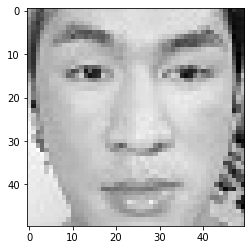

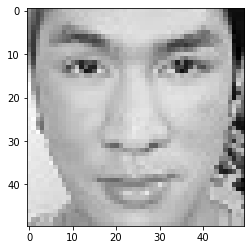

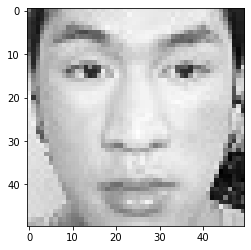

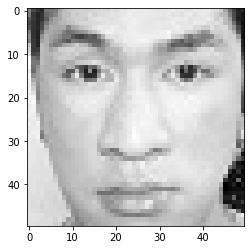

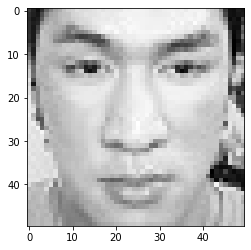

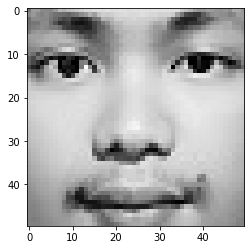

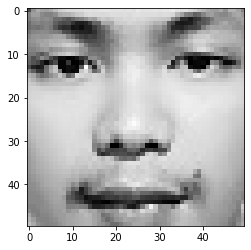

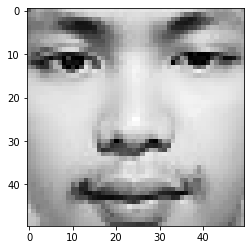

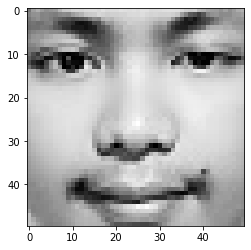

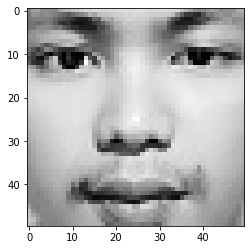

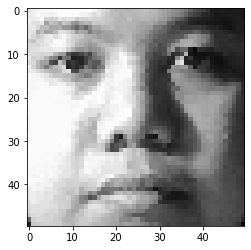

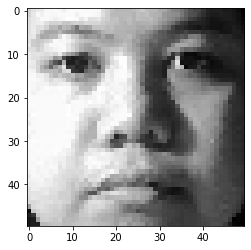

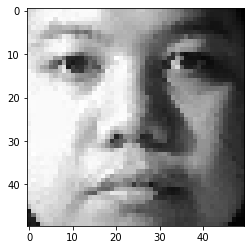

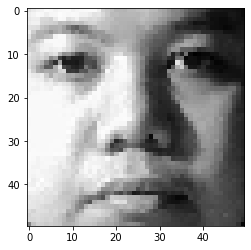

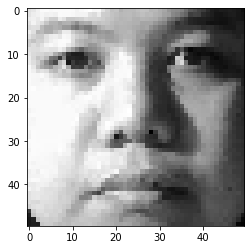

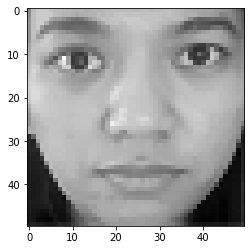

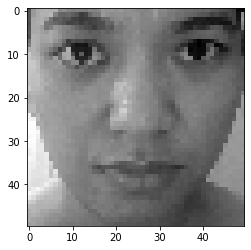

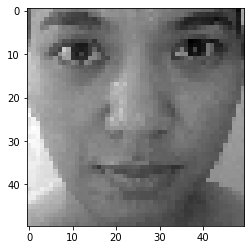

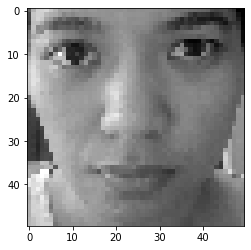

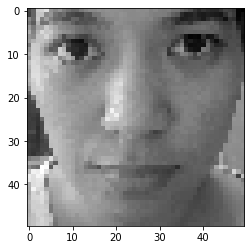

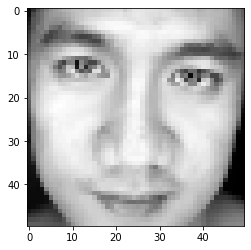

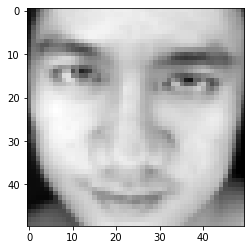

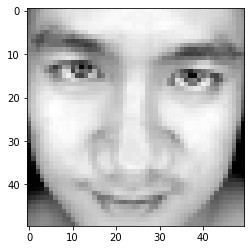

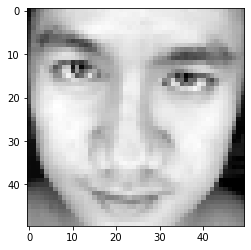

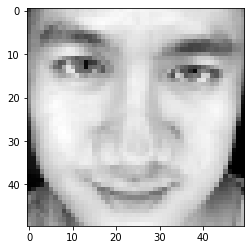

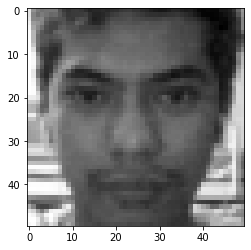

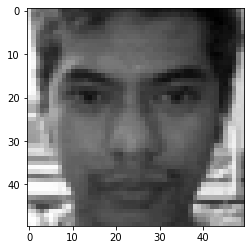

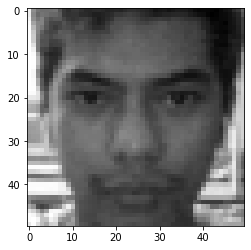

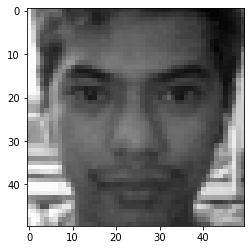

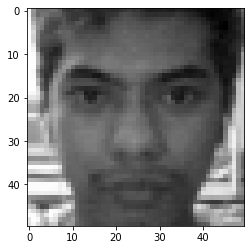

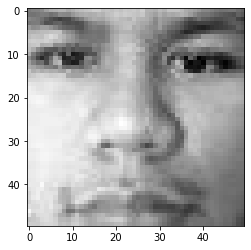

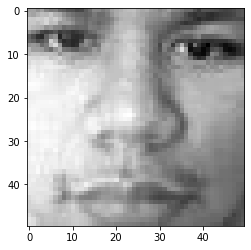

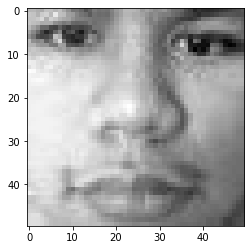

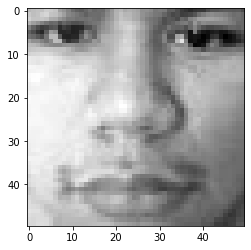

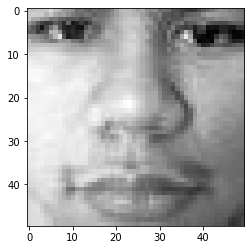

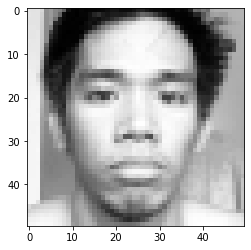

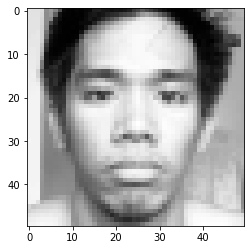

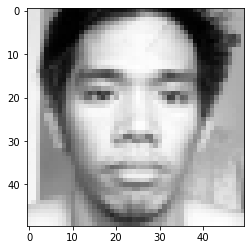

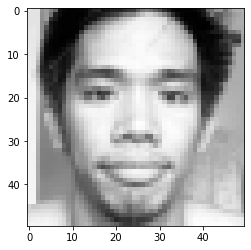

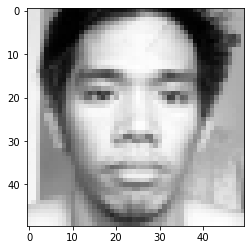

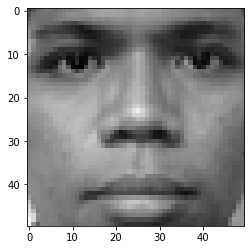

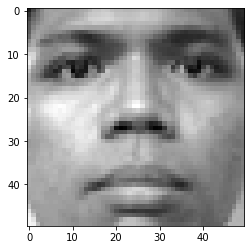

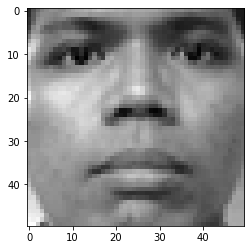

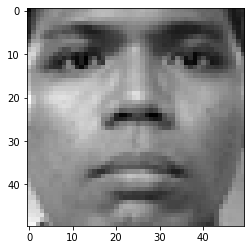

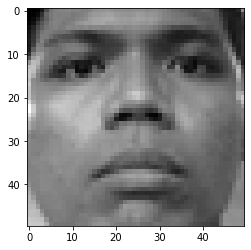

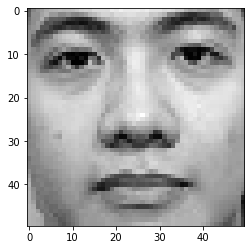

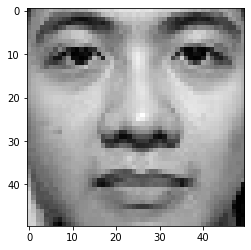

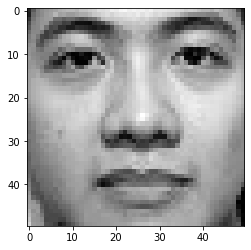

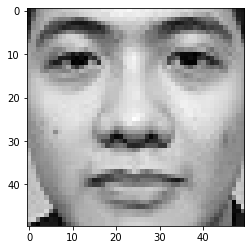

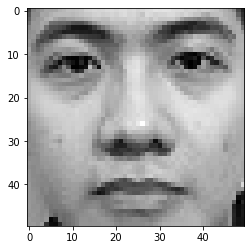

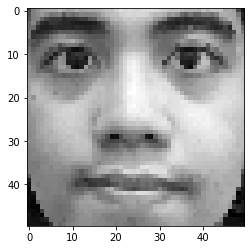

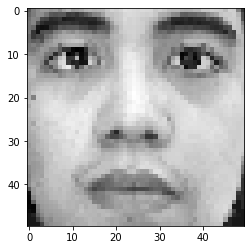

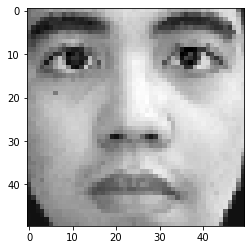

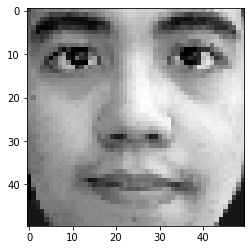

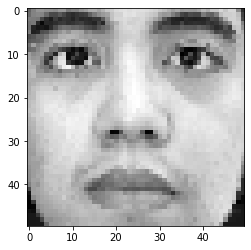

In [15]:
faces = load_images_from_folder(path)
# for i in range(len(faces)):
#     plt.imshow(faces[i], cmap = "gray")
#     plt.show()

In [17]:
DATA = np.zeros(shape=(len(faces), 2500)) 

In [23]:
for i in range(len(faces)):
    DATA[i,:] = np.ravel(faces[i])

In [25]:
DATA_cov = np.cov(DATA)

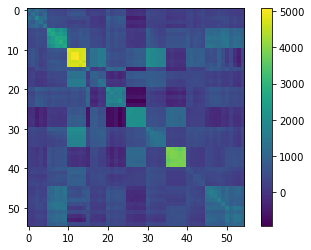

In [27]:
plt.imshow(DATA_cov)
plt.colorbar()

In [29]:
evals, evecs = np.linalg.eigh(DATA_cov)

In [36]:
evals

array([-1.40040487e-13,  5.96758776e+00,  7.87019110e+00,  2.74786472e+01,
        2.98252154e+01,  3.09053174e+01,  3.46608750e+01,  3.73286731e+01,
        4.08943072e+01,  5.18620331e+01,  5.54156040e+01,  5.94874194e+01,
        6.13321243e+01,  7.00499557e+01,  7.46759444e+01,  8.07798945e+01,
        8.58669733e+01,  8.82135624e+01,  9.37739667e+01,  1.07442755e+02,
        1.16344110e+02,  1.25901613e+02,  1.44631181e+02,  1.62778283e+02,
        1.65579912e+02,  1.81759164e+02,  2.10097191e+02,  2.11318179e+02,
        2.14183001e+02,  2.45746863e+02,  2.48232057e+02,  2.64462077e+02,
        2.99446839e+02,  3.09657359e+02,  3.22084464e+02,  3.59451114e+02,
        3.60130578e+02,  4.13942237e+02,  4.72569335e+02,  4.97429965e+02,
        6.43033613e+02,  7.23012889e+02,  7.59768810e+02,  9.28256020e+02,
        1.03145596e+03,  1.22318052e+03,  1.55797941e+03,  2.41708731e+03,
        3.11863551e+03,  3.95814115e+03,  4.61414604e+03,  9.17828285e+03,
        2.07172839e+04,  

In [31]:
evecs

array([[ 0.00000000e+00,  7.46224500e-03, -6.88199866e-03, ...,
        -5.66902187e-02,  8.65429142e-03, -5.73018281e-02],
       [ 1.81625459e-16, -2.41312102e-03,  1.81551040e-03, ...,
        -5.33067192e-02,  1.61045750e-02, -6.67839666e-02],
       [ 1.62089961e-15, -2.99915008e-03, -1.49311352e-03, ...,
        -1.17164887e-01,  2.43626864e-02, -6.26373038e-02],
       ...,
       [ 8.52929251e-15, -1.56482763e-03, -9.91652720e-03, ...,
        -1.68623131e-01, -9.27182080e-02, -6.21738385e-02],
       [-1.89007362e-15,  1.39811467e-03,  2.01397012e-03, ...,
        -1.68191619e-01, -1.03182649e-01, -4.34950878e-02],
       [-1.76591315e-14,  1.79892868e-02,  1.04188863e-04, ...,
        -1.08547906e-01, -6.67068459e-02, -8.56280592e-02]])

In [209]:
components = 55
from sklearn.decomposition import PCA
pca = PCA(components)
pca.fit(DATA)
mean = pca.mean_
eigenvector = pca.components_
eigenvalues = pca.explained_variance_
explained = pca.explained_variance_ratio_

## Percent (%) Explained

Text(0.5, 0, 'number of components')

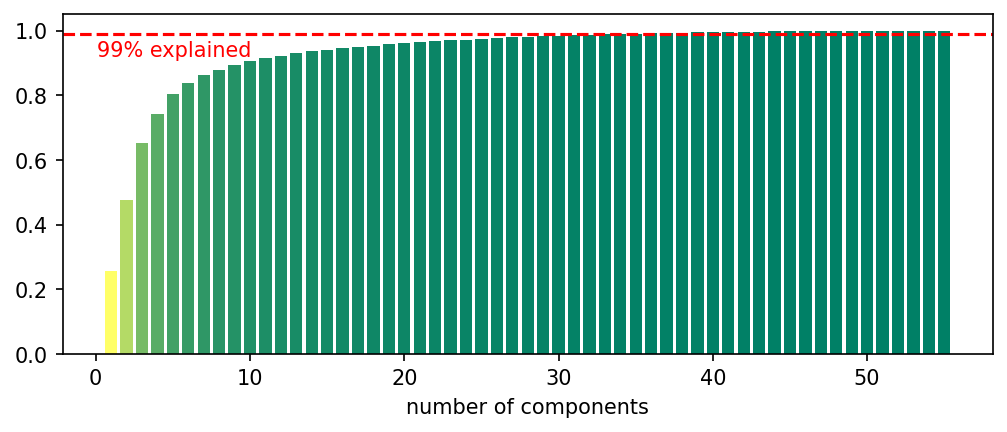

In [212]:
plt.figure(figsize=(8,3), dpi = 150)

plt.bar(range(1, components+1), np.cumsum(explained), 
            color = plt.cm.summer_r((np.cumsum(explained)-explained[0])/(1-explained[0])))

plt.axhline(0.99, color = 'r', ls = "--")
plt.text(0.1, 0.92, "99% explained", color = "r")
plt.xlabel("number of components")

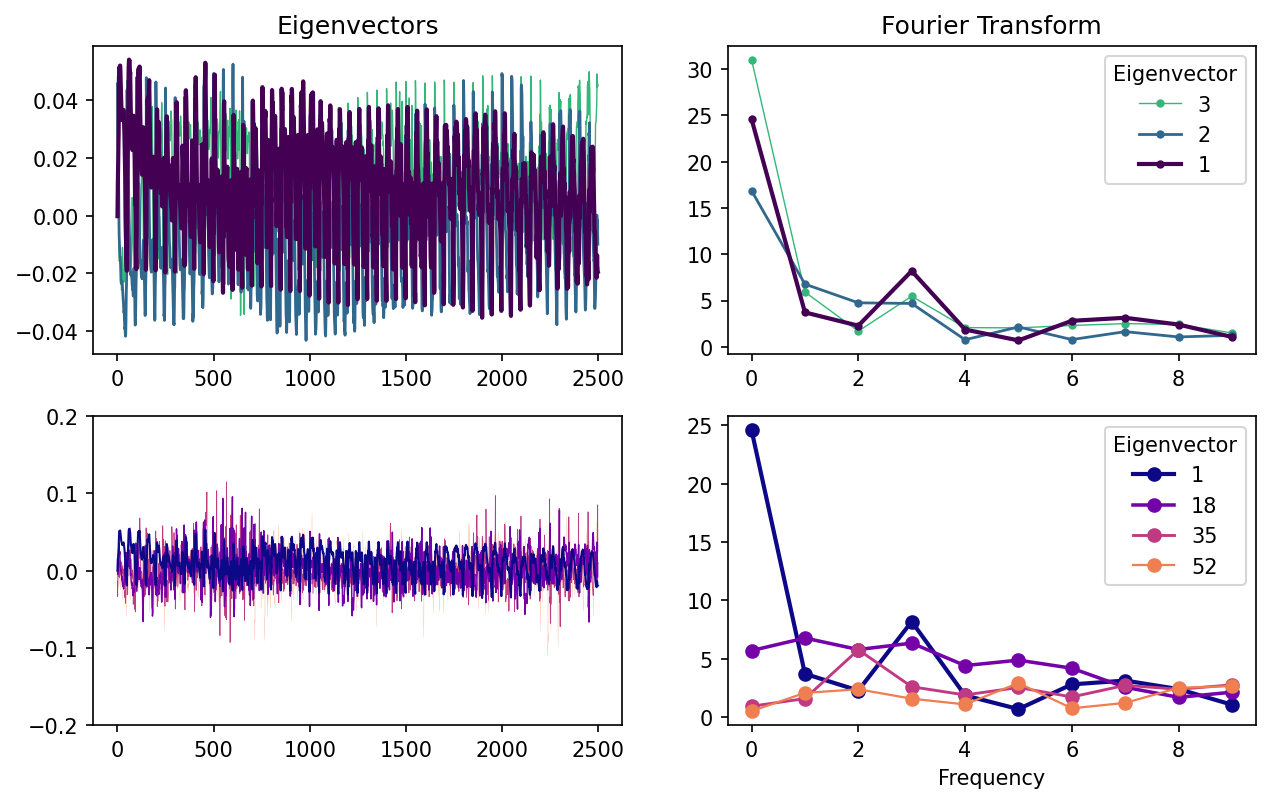

In [207]:
components = 3

plt.figure(figsize=(10,6), dpi = 150)

plt.subplot(221)

for i in np.flip(range(components)):
    plt.plot(eigenvector[i,:], label = str(i+1),
             color = plt.cm.viridis(i/components), lw = 2*(components - i)/components)
plt.title("Eigenvectors")
# plt.ylim(-0.2,0.2)

plt.subplot(222)
for i in np.flip(range(components)):
    FT = abs(fft.fft(eigenvector[i,:]))
    plt.plot(FT[:10], ".-", label = str(i+1),
             color = plt.cm.viridis(i/components), lw = 2*(components - i)/components)
plt.title("Fourier Transform")
legend = plt.legend()
legend.set_title("Eigenvector")



plt.subplot(223)

for i in np.flip(np.arange(0,55,17)):
        plt.plot(eigenvector[i,:], label = str(i+1),
                 color = plt.cm.plasma(i/75), lw = 1*(55 - i)/55)
plt.ylim(-0.2,0.2)

plt.subplot(224)

for i in np.arange(0,55,17):
    FT = abs(fft.fft(eigenvector[i,:]))
    plt.plot(FT[:10], "o-", label = str(i+1),
             color = plt.cm.plasma(i/75), lw = 2*(55 - i*0.5)/55)
    plt.xlabel("Frequency")
legend = plt.legend()
legend.set_title("Eigenvector")

# plt.show()


In [186]:
np.flip(np.arange(0,55,17))

array([51, 34, 17,  0])

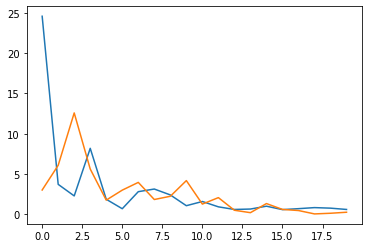

In [141]:
FT = abs(fft.fft(eigenvector[0,:]))
FT1 = abs(fft.fft(eigenvector[5,:]))

plt.plot(FT[:20])
plt.plot(FT1[:20])

In [216]:
xx = 3

test = DATA[xx,:]
test_less_mu = test - mean
coeffs = np.dot(eigenvector, test_less_mu)
PC = coeffs*eigenvector.T

pcs = [1,5,10]

for j in range(1, 55):
    PC[:,0] += PC[:,j]
    reconstruction = PC[:,0] + mean

C:\Users\renep\AppData\Local\Temp/ipykernel_13488/3618359547.py:10: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(test.reshape((50,50))-reconstruction.reshape((50,50))))
C:\Users\renep\AppData\Local\Temp/ipykernel_13488/3618359547.py:10: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(test.reshape((50,50))-reconstruction.reshape((50,50))))


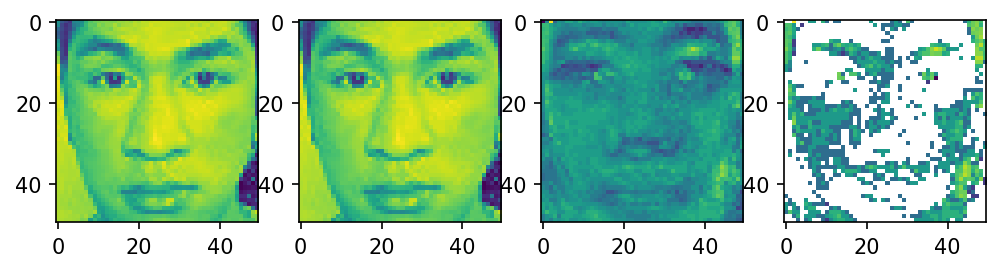

In [217]:
plt.figure(figsize=(8,4), dpi = 150)

plt.subplot(141)
plt.imshow(test.reshape((50,50)))
plt.subplot(142)
plt.imshow(reconstruction.reshape((50,50)))
plt.subplot(143)
plt.imshow(test.reshape((50,50))-reconstruction.reshape((50,50)))
plt.subplot(144)
plt.imshow(np.log(test.reshape((50,50))-reconstruction.reshape((50,50))))